In [6]:
import numpy as np
import matplotlib
import pandas as pd
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib
import pandas as pd
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
rng = np.random.RandomState(123)

# 1. Simulate Data

In [10]:
M = 2
K = 3
n = 100
N = n * K

Xk = [np.random.randn(n, M) + np.array(x) for x in [[0, 10], [5, 5], [10, 0]]]
Yk = [np.array([x for i in range(n)]) for x in [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
X = np.concatenate(Xk)
Y = np.concatenate(Yk)

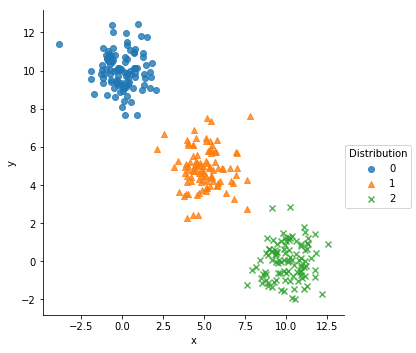

In [11]:
x_df = pd.DataFrame(X, columns = ['x', 'y'])
x_df['Distribution'] = np.argmax(Y, axis=1)
g = sns.lmplot(x='x', y='y', data=x_df, hue='Distribution', markers=["o", "^", "x"], fit_reg=False)

# 2. Defining the Graph

In [ ]:
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [ ]:
batch_size = 50
n_batches = N

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [36]:
batch_size = 50
n_batches = N

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i* batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
                x: X_[start:end],
                t: Y_[start:end]
            })

In [28]:
X_[start:end]

array([], shape=(0, 2), dtype=float64)

# 3. Check your result

In [43]:
X_, Y_ = shuffle(X,Y)
classified = correct_prediction.eval(session = sess, feed_dict={
        x: X_[0:10],
        t: Y_[0:10]
    })

prob = y.eval(session=sess, feed_dict={
        x: X_[0:10]
    })
W.eval(session = sess)

array([[-1.09302533,  0.29328179,  0.79974359],
       [ 0.78649503,  0.27921391, -1.06570876]], dtype=float32)

as expected the model diverges

In [44]:
# Calculate the boundaries